# Import

In [1]:
import sys
sys.path.append("/home/leonid/github.com/LeonidPilyugin/upt")

In [2]:
from upt import *
print("Import done!")

Import done!


# Read data

In [3]:
data = Data("../data/data.csv")
data.head(5)

,T,h1,h2
0,"293.00 +/- 0.05, kelvin","5.190 +/- 0.003, centimeter","2.58 +/- 0.03, centimeter"
1,"295.00 +/- 0.05, kelvin","5.300 +/- 0.003, centimeter","2.50 +/- 0.03, centimeter"
2,"296.00 +/- 0.05, kelvin","5.345 +/- 0.003, centimeter","2.44 +/- 0.02, centimeter"
3,"297.00 +/- 0.05, kelvin","5.420 +/- 0.003, centimeter","2.36 +/- 0.02, centimeter"
4,"298.00 +/- 0.05, kelvin","5.500 +/- 0.003, centimeter","2.29 +/- 0.02, centimeter"


# Texify primary data

In [4]:
texify(data, path="../tex/table1.tex")

# Add values

In [5]:
r_hg = Value(13550, 1, u.kg/u.m**3)
r_w = Value(1000, 1, u.kg/u.m**3)
dh = Value(8.4, 0.0025, u.cm)
g = c.Other.g
r_hg, r_w, g, dh

(13550.0 +/- 1.0, kilogram / meter ** 3,
 1000.0 +/- 1.0, kilogram / meter ** 3,
 (98154.0 +/- 1.0) e-4, meter / second ** 2,
 8.400 +/- 0.003, centimeter)

# Compute

In [6]:
data["p"] = ((data["h1"] - data["h2"]) * r_hg * g - r_w * g * dh).to(u.Pa)
data["1/T"] = data["T"] ** -1
data["lnp"] = m.log(data["p"] / Value(1.0, unit=data["p"].u))
data.df.head(5)

,T,h1,h2,p,1/T,lnp
0,"293.00 +/- 0.05, kelvin","5.190 +/- 0.003, centimeter","2.58 +/- 0.03, centimeter","2650 +/- 30, pascal","(34130 +/- 6) e-7, 1 / kelvin",7.881 +/- 0.013
1,"295.00 +/- 0.05, kelvin","5.300 +/- 0.003, centimeter","2.50 +/- 0.03, centimeter","2900 +/- 30, pascal","(33898 +/- 6) e-7, 1 / kelvin",7.972 +/- 0.012
2,"296.00 +/- 0.05, kelvin","5.345 +/- 0.003, centimeter","2.44 +/- 0.02, centimeter","3040 +/- 30, pascal","(33784 +/- 6) e-7, 1 / kelvin",8.019 +/- 0.011
3,"297.00 +/- 0.05, kelvin","5.420 +/- 0.003, centimeter","2.36 +/- 0.02, centimeter","3250 +/- 30, pascal","(33670 +/- 6) e-7, 1 / kelvin",8.0850 +/- 0.0097
4,"298.00 +/- 0.05, kelvin","5.500 +/- 0.003, centimeter","2.29 +/- 0.02, centimeter","3440 +/- 30, pascal","(33557 +/- 6) e-7, 1 / kelvin",8.143 +/- 0.009


# Plot

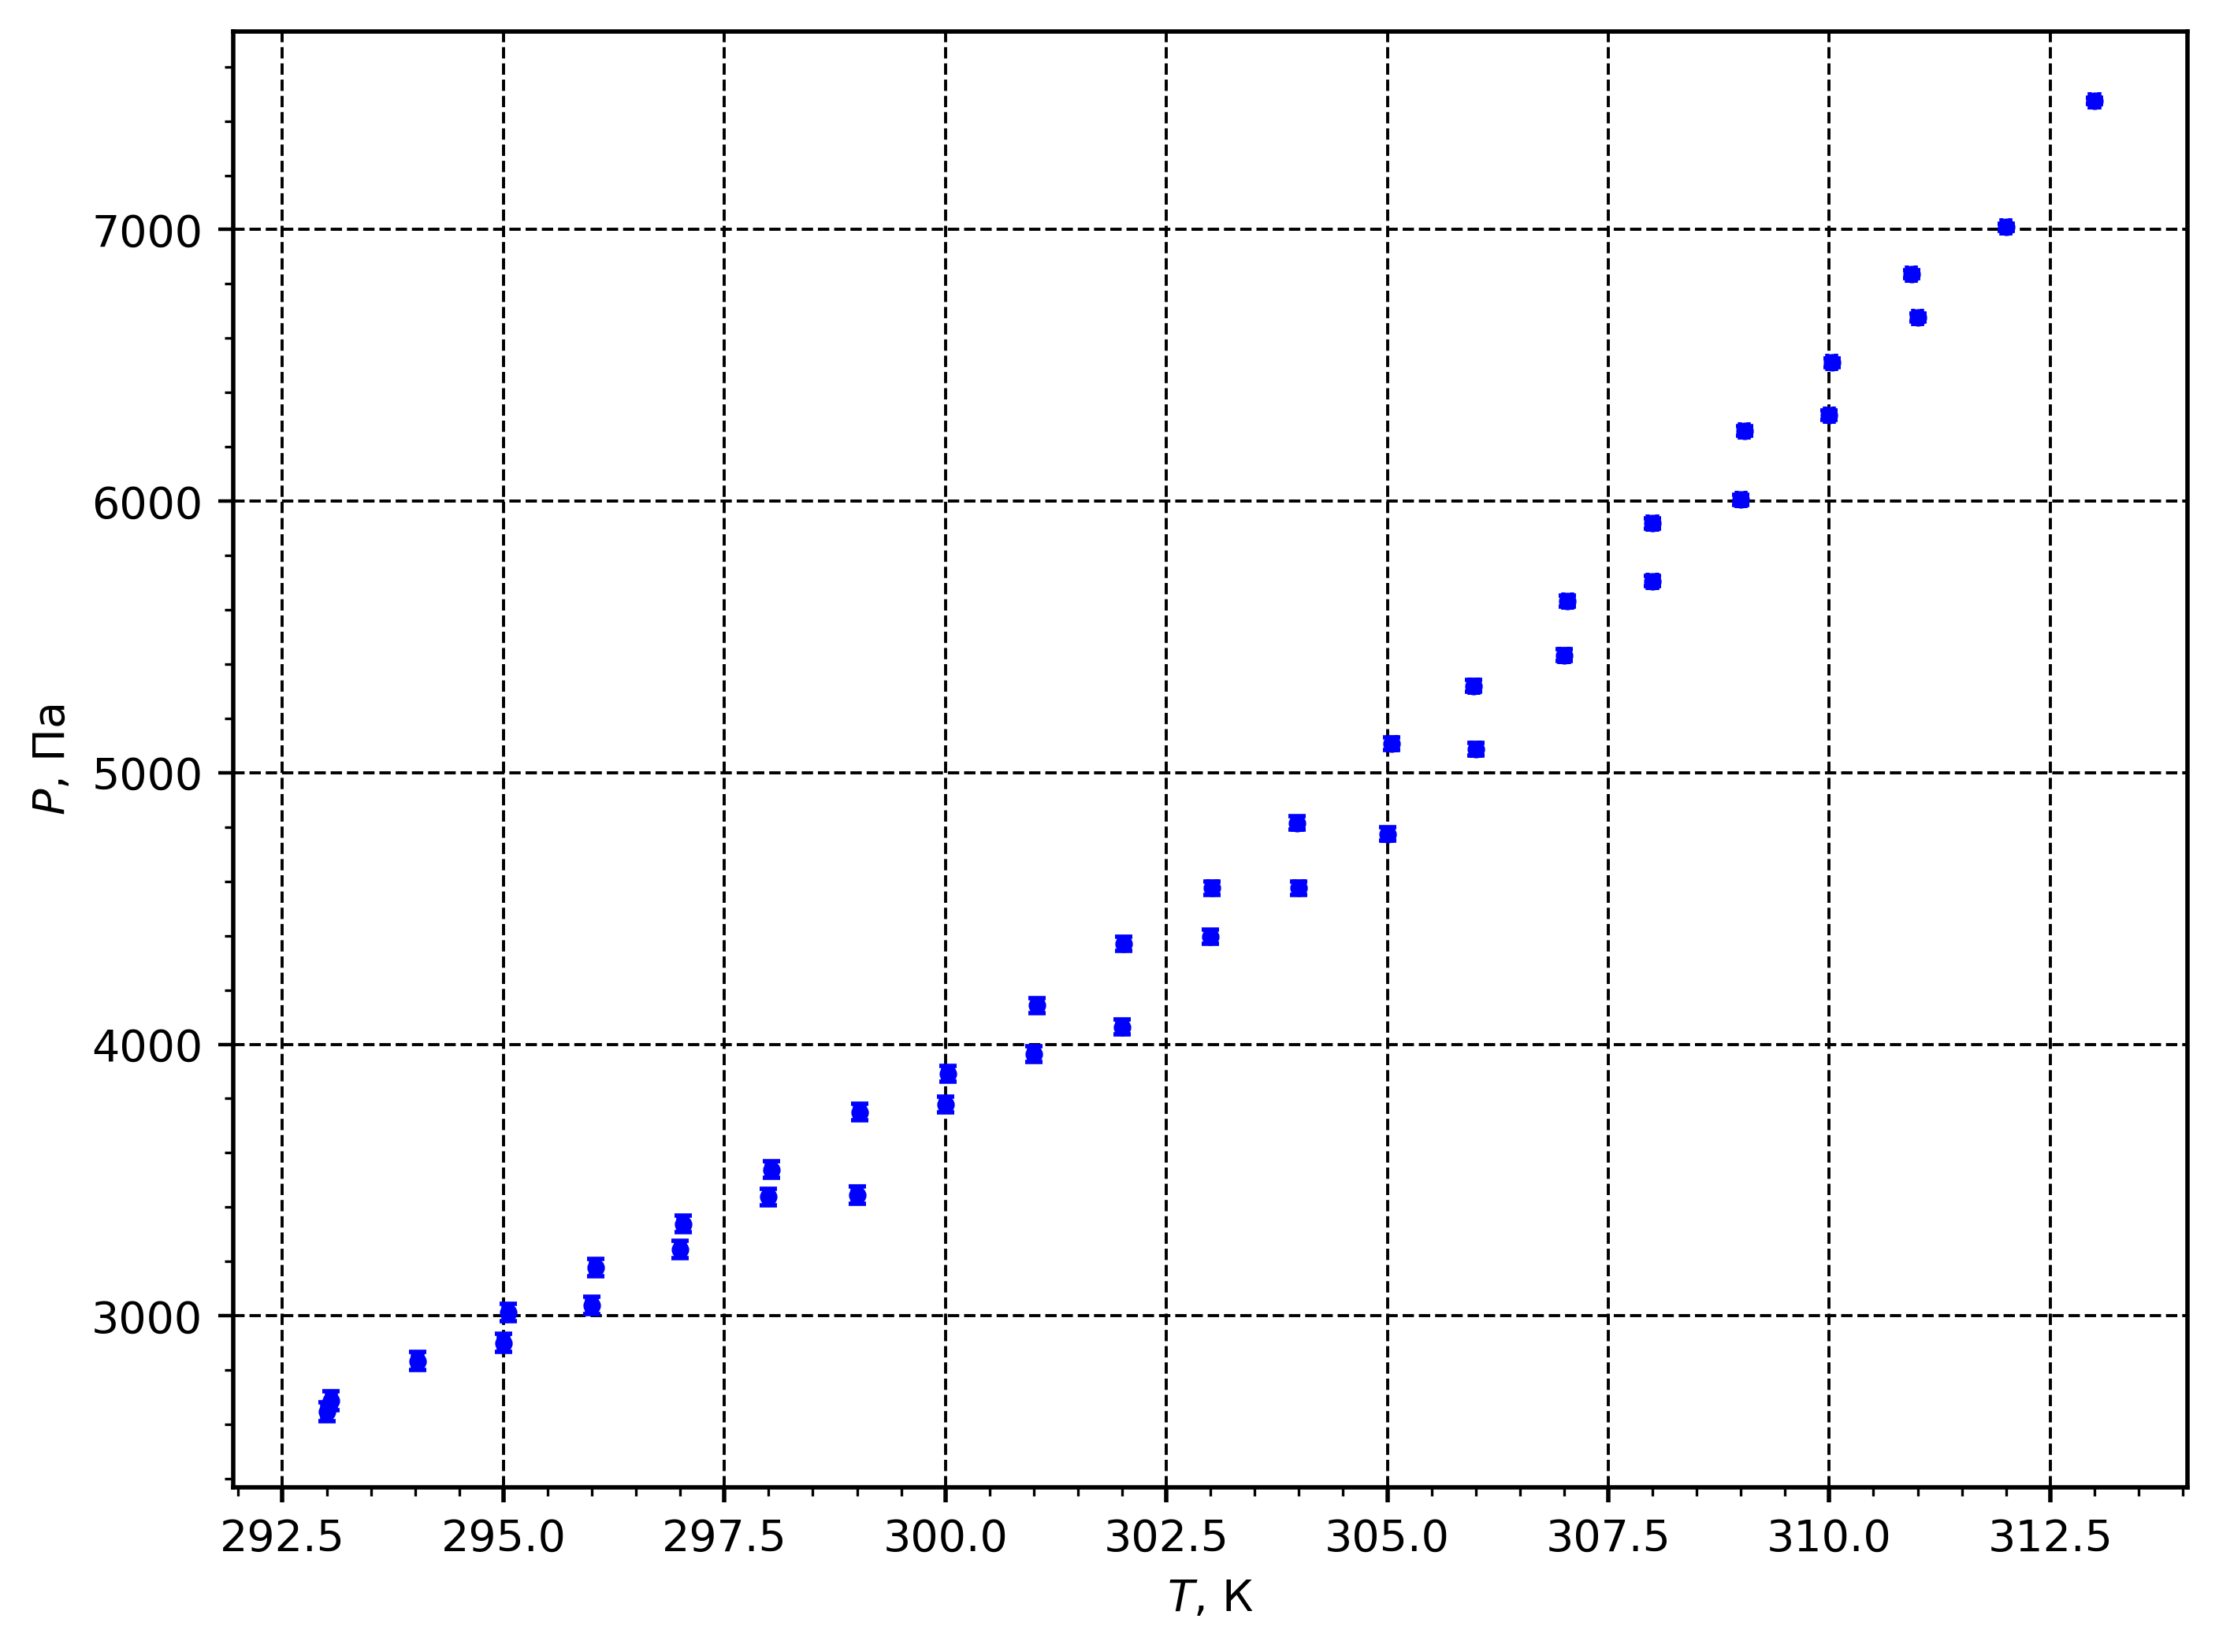

In [7]:
p1 = Plot()
p1.plot(data["T"], data["p"], fmt=".")
p1.xlabel("$T$")
p1.ylabel("$P$")

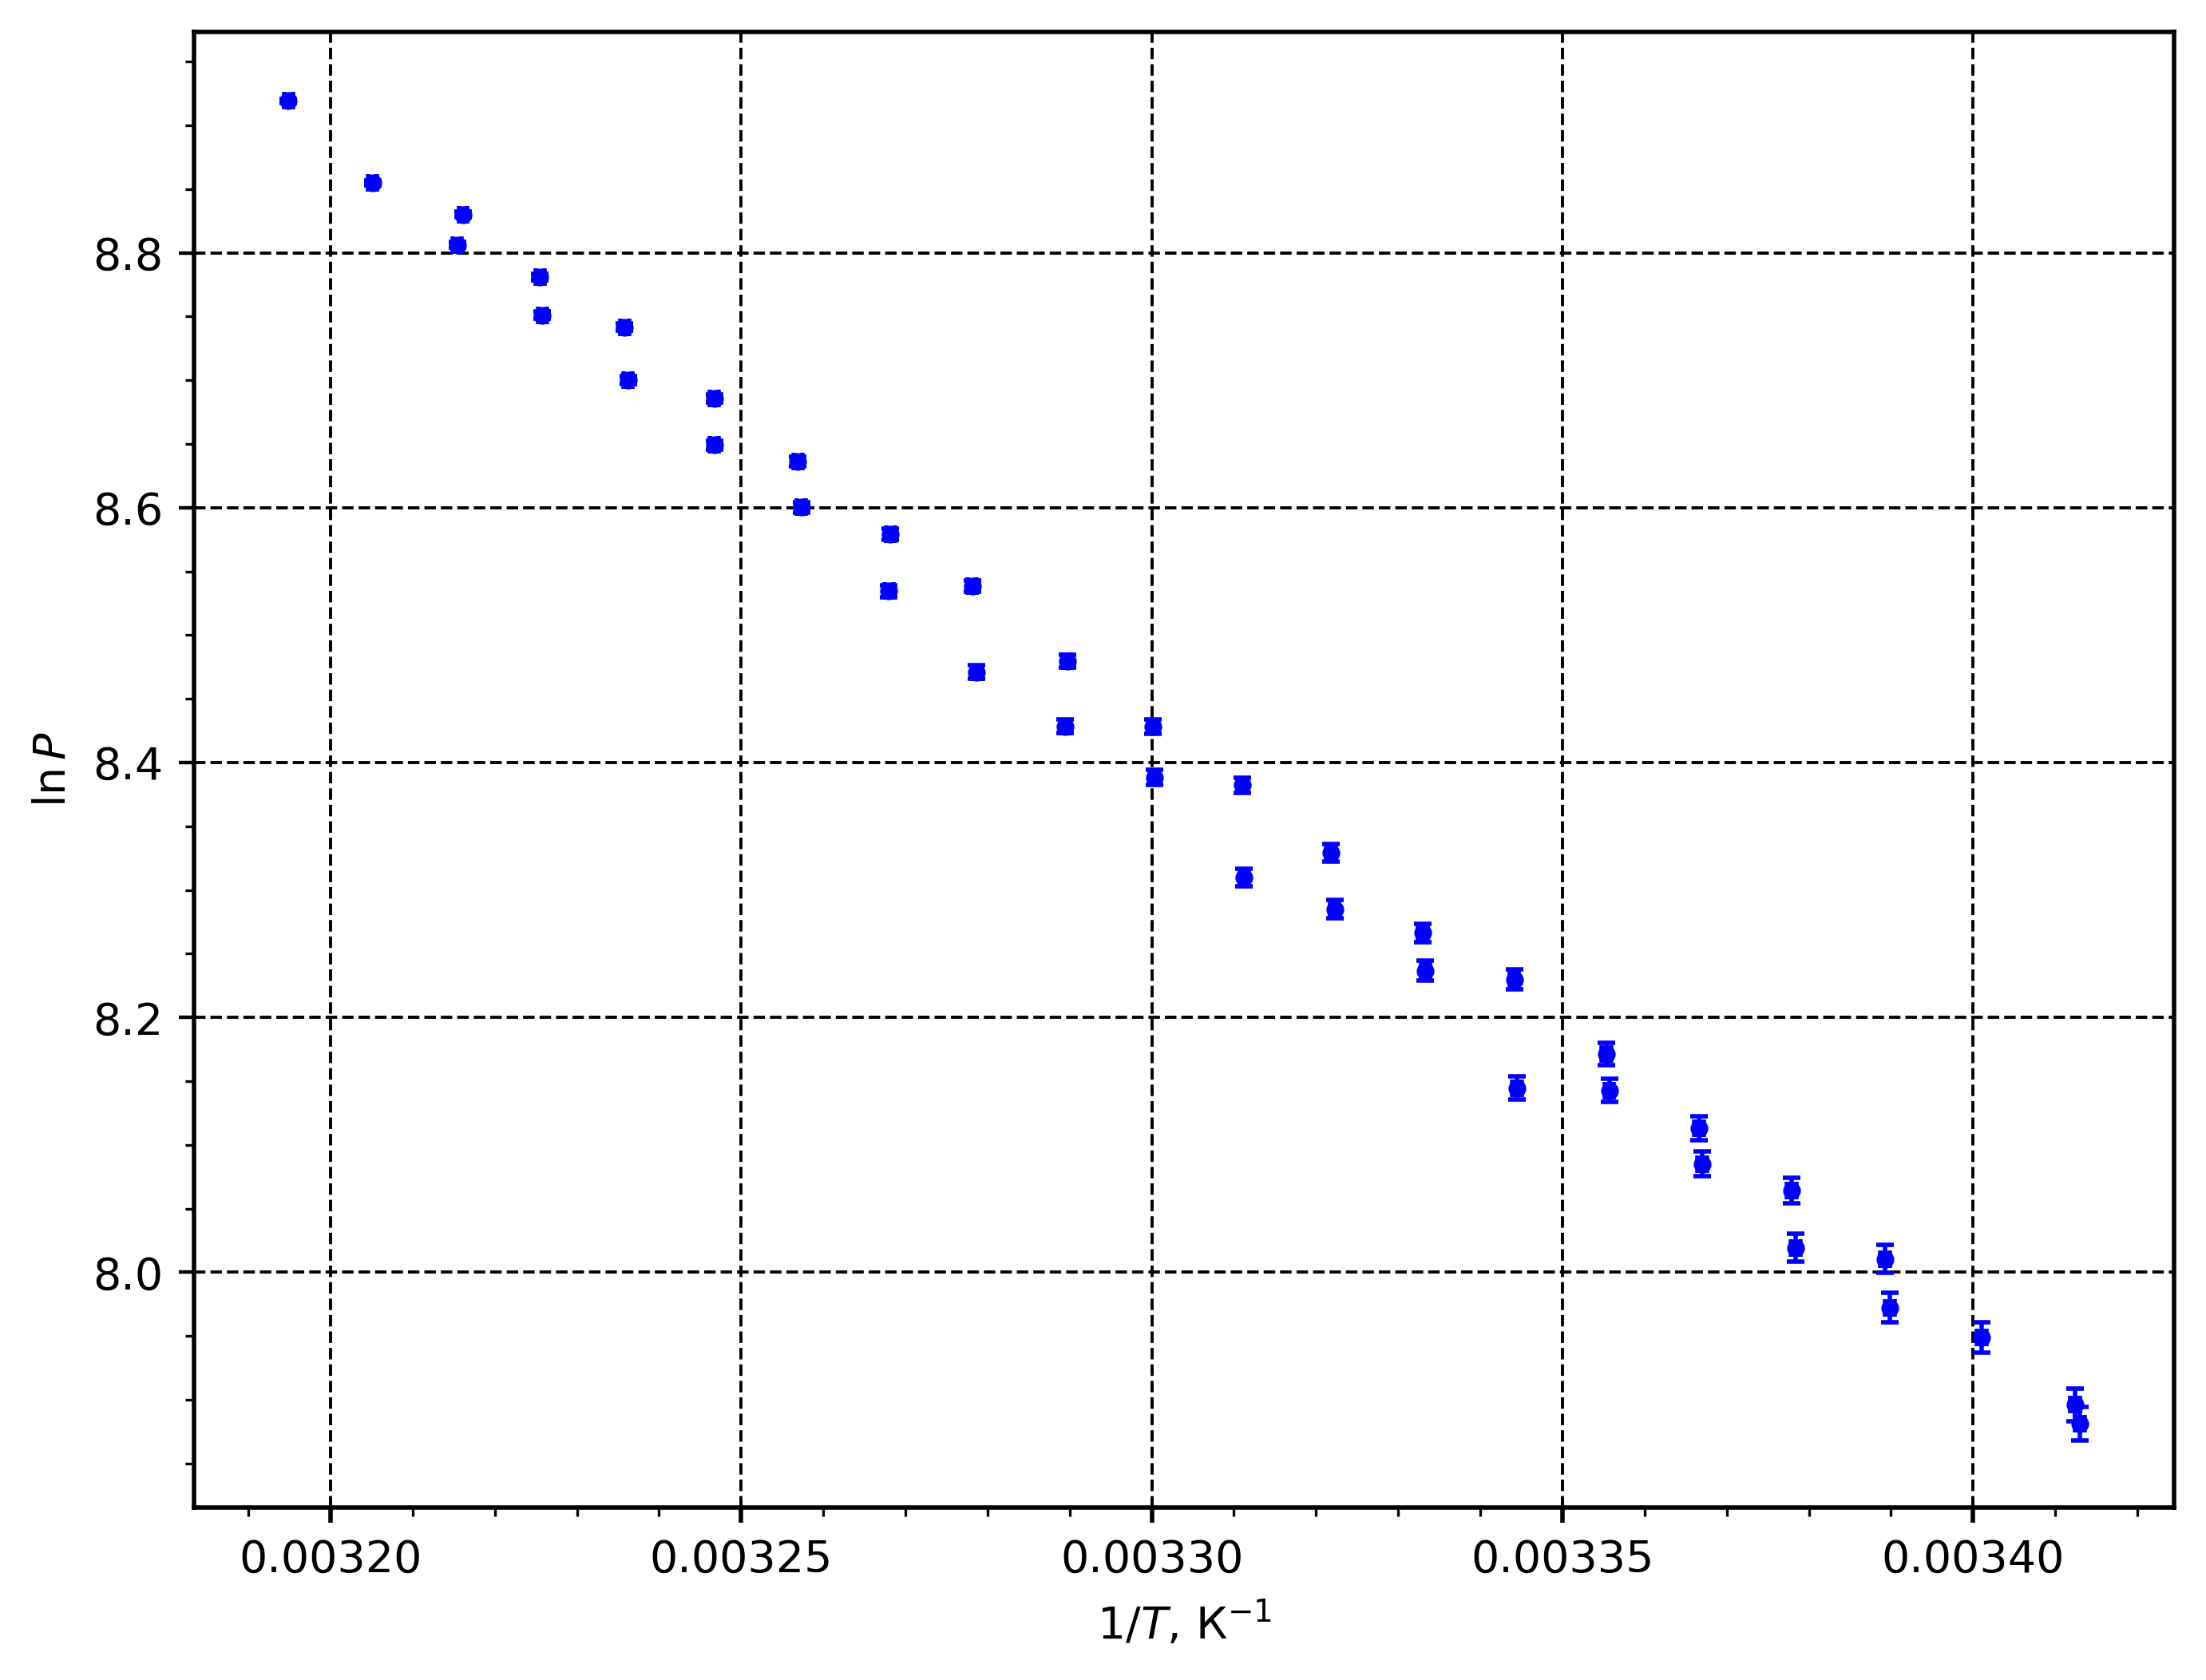

In [8]:
p2 = Plot()
p2.plot(data["1/T"], data["lnp"], fmt=".")
p2.xlabel("$1/T$")
p2.ylabel("$\\ln P$")

# Linear fit

In [9]:
k1, b1 = chi2(data["T"], data["p"])
k2, b2 = chi2(data["1/T"], data["lnp"])
print(f"k1 = {k1}\nk2 = {k2}")
print(f"b1 = {b1}\nb2 = {b2}")

k1 = 251 +/- 6, pascal / kelvin
k2 = -4780 +/- 60, kelvin
b1 = -71000 +/- 2000, pascal
b2 = 24.2 +/- 0.2


# Plot lines and save

In [10]:
p1.line(k1, b1, error=False, color="black")
p1.save("../img/plot1.png")

In [11]:
p2.line(k2, b2, error=False, color="black")
p2.save("../img/plot2.png")

# Result

In [12]:
L1 = c.Chemistry.R * data["T"].mean() ** 2 / data["p"].mean() * k1
L2 = -1 * c.Chemistry.R * k2
print(f"L1 = {L1}\nL2 = {L2}")

L1 = 41570 +/- 1000, joule * mole
L2 = 39800 +/- 500, joule * mole


In [13]:
texify(L1)
texify(L2)

41570 \pm 1000\;\text{Дж}\cdot\text{моль}
39800 \pm 500\;\text{Дж}\cdot\text{моль}


# Texify intermediate data

In [14]:
texify(data, path="../tex/table2.tex")